# ***ANN on Breast Cancer Predition***

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [41]:
cancer = load_breast_cancer()

In [42]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [43]:
print(cancer.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [44]:
print(cancer.target_names)

['malignant' 'benign']


In [45]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [46]:
print(cancer.data.shape)

(569, 30)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [48]:
mlp = MLPClassifier() #default iteration 200, default hidden layers 100
mlp.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [49]:
print('Accuracy on the training subset:', (mlp.score(X_train, y_train)))
print('Accuracy on the test subset: ', (mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.9413145539906104
Accuracy on the test subset:  0.8881118881118881


In [50]:
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [51]:
from sklearn.preprocessing import StandardScaler #as preprocessing module
scaler = StandardScaler() # intantiate the object
X_train_scaled = scaler.fit(X_train).transform(X_train) #fit and transform the data
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [52]:
mlp = MLPClassifier(max_iter=100, random_state=42) #multi layer perceptron with 1000
mlp.fit(X_train_scaled, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100, random_state=42)

In [53]:
print('Accuracy on the training subset (Scaled Set):', (mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: (Scaled Set):', (mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset (Scaled Set): 0.9929577464788732
Accuracy on the test subset: (Scaled Set): 0.965034965034965


In [54]:
mlp = MLPClassifier(max_iter=100, alpha=5, random_state=0)
mlp.fit(X_train_scaled, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=5, max_iter=100, random_state=0)

In [55]:
print('Accuracy on the training subset(Changed alpha): ',(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset(Changed alpha): ',(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset(Changed alpha):  0.9765258215962441
Accuracy on the test subset(Changed alpha):  0.958041958041958


In [56]:
mlp = MLPClassifier(max_iter=100, alpha=0.001, random_state=42, activation='logistic')
mlp.fit(X_train_scaled, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.001, max_iter=100, random_state=42)

In [57]:
print('Accuracy on the training subset(Changed alpha): ',(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset(Changed alpha): ',(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset(Changed alpha):  0.9835680751173709
Accuracy on the test subset(Changed alpha):  0.965034965034965


In [58]:
# l2 regularization
# activation function produce output, tranfers information from input to output 
# activation function depends on data (linear, classes)


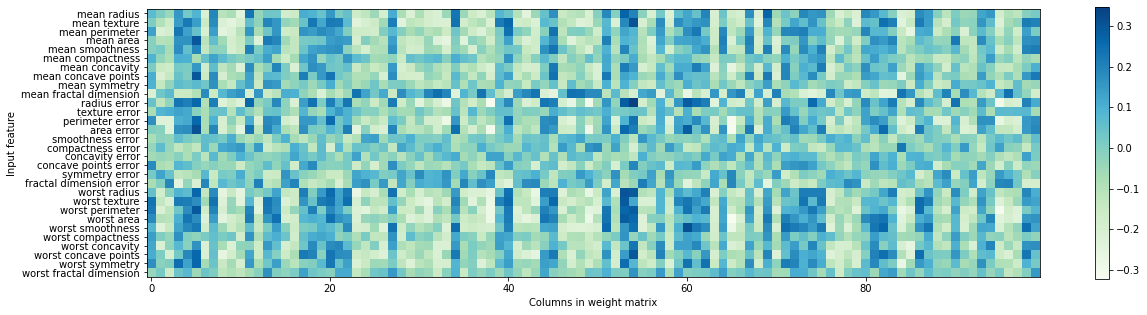

In [59]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()